<a href="https://colab.research.google.com/github/rhemish/Retail-cost-prediction-using-LSTM-MSNET/blob/MLP_proj/MLP_Project_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/rhemish/Retail-cost-prediction-using-LSTM-MSNET

Cloning into 'Retail-cost-prediction-using-LSTM-MSNET'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 19 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (19/19), 174.41 KiB | 4.59 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [2]:
%cd Retail-cost-prediction-using-LSTM-MSNET

/content/Retail-cost-prediction-using-LSTM-MSNET


In [3]:
!git config --global user.email rolabayo@gmail.com
!git config --global user.name rhemish

In [4]:
!pip install pandas numpy matplotlib tensorflow torch scikit-learn statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
import tensorflow as tf
from torch import nn, optim
import torch
import math
from torch.utils.data import Dataset, DataLoader

In [6]:
df_train=pd.read_excel("/content/Retail-cost-prediction-using-LSTM-MSNET/Quarterly-train_cut.xlsx")
df_test=pd.read_excel("/content/Retail-cost-prediction-using-LSTM-MSNET/Quarterly-test_cut.xlsx")

<Axes: >

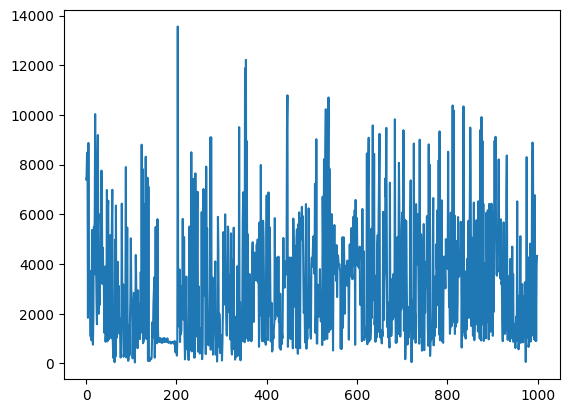

In [7]:
df_train["V2"].plot()

<Axes: >

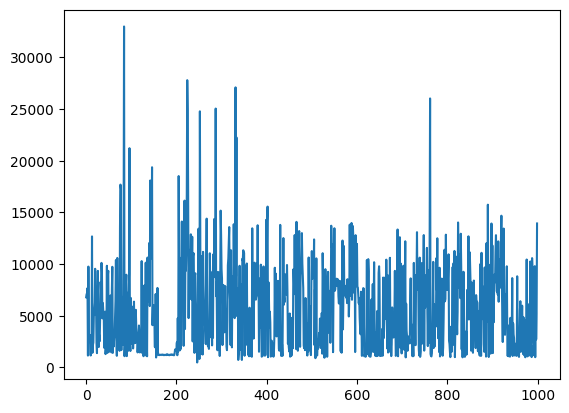

In [8]:
df_test["V2"].plot()

In [9]:
df_train.isnull().sum()

,0
V1,0
V2,0
V3,0
V4,0
V5,0
...,...
V863,1000
V864,1000
V865,1000
V866,1000


In [10]:
df_test.isnull().sum()

,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [11]:
from sklearn.impute import SimpleImputer
mean_imputer =SimpleImputer(missing_values=np.nan, strategy='mean')

In [12]:
df=df_train.drop(['V1'], axis = 1)
df1=df_train.drop(['V1'], axis = 1)
df1_test=df_test.drop(['V1'], axis = 1)
df_test=df_test.iloc[:,1:]

In [13]:
df.head()

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V858,V859,V860,V861,V862,V863,V864,V865,V866,V867
0,7407.412314,7528.566074,7374.709225,7395.514848,7654.007989,7686.847835,7578.190743,7904.376716,7744.049254,7889.909013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7552.454619,7541.774571,7466.568336,7550.333354,8067.131522,8063.701017,7901.029312,8155.387316,8031.010328,8023.240005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8463.842193,8366.102309,8269.502192,8256.985325,8726.917647,8733.243591,8664.260087,8717.394568,8662.139727,8629.101896,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8498.941194,8409.926442,8391.441381,8292.860310,8798.521118,8753.990355,8740.062556,8695.540651,8627.447488,8525.993424,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1835.000000,2322.000000,3059.000000,1883.000000,1896.000000,2060.000000,2764.000000,1743.000000,1561.000000,1934.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_test.head()

,V2,V3,V4,V5,V6,V7,V8,V9
0,6790.643698,6598.952202,6608.527173,6765.914014,6992.949003,6931.539,7161.240869,6981.304105
1,7081.709669,6789.414723,6895.838545,7050.508939,7155.206969,7075.445,7373.832383,7339.981903
2,7188.893596,6986.330400,7025.162033,7066.270724,7129.545542,7079.719,7242.259002,7043.345329
3,7679.102564,7483.094657,7510.212380,7600.148193,7714.398010,7677.571,7922.636157,7707.159526
4,1150.000000,995.000000,1083.000000,1465.000000,1079.000000,948.000,1298.000000,1763.000000


In [15]:
mean_imputer = mean_imputer.fit(df)
imputed_df = mean_imputer.transform(df)

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['V273' 'V274' 'V275' 'V276' 'V277' 'V278' 'V279' 'V280' 'V281' 'V282'
 'V283' 'V284' 'V285' 'V286' 'V287' 'V288' 'V289' 'V290' 'V291' 'V292'
 'V293' 'V294' 'V295' 'V296' 'V297' 'V298' 'V299' 'V300' 'V301' 'V302'
 'V303' 'V304' 'V305' 'V306' 'V307' 'V308' 'V309' 'V310' 'V311' 'V312'
 'V313' 'V314' 'V315' 'V316' 'V317' 'V318' 'V319' 'V320' 'V321' 'V322'
 'V323' 'V324' 'V325' 'V326' 'V327' 'V328' 'V329' 'V330' 'V331' 'V332'
 'V333' 'V334' 'V335' 'V336' 'V337' 'V338' 'V339' 'V340' 'V341' 'V342'
 'V343' 'V344' 'V345' 'V346' 'V347' 'V348' 'V349' 'V350' 'V351' 'V352'
 'V353' 'V354' 'V355' 'V356' 'V357' 'V358' 'V359' 'V360' 'V361' 'V362'
 'V363' 'V364' 'V365' 'V366' 'V367' 'V368' 'V369' 'V370' 'V371' 'V372'
 'V373' 'V374' 'V375' 'V376' 'V377' 'V378' 'V379' 'V380' 'V381' 'V382'
 'V383' 'V384' 'V385' 'V386' 'V387' 'V388' 'V389' 'V390' 'V391' 'V392'
 'V393' 'V394' 'V39

In [16]:
mean_imputer = mean_imputer.fit(df_test)
imputed_df_test = mean_imputer.transform(df_test)

In [17]:
print(np.isnan(imputed_df).sum())
print(np.isnan(imputed_df_test).sum())

0
0


In [18]:
print(imputed_df.shape)
imputed_df_test.shape

(1000, 271)


(1000, 8)

In [20]:
for i in range(0,271): #updated range to match new data shape
    imputed_df[:,i]=imputed_df[:,i]/np.mean(imputed_df[:,i])

In [22]:
imputed_df[:,1]

array([2.40129027, 2.40550322, 2.66842848, 2.6824065 , 0.74061859,
       2.85434789, 1.09029136, 0.83774106, 0.91534334, 0.7495175 ,
       0.34322983, 1.2911387 , 0.30412568, 1.57564852, 0.50267653,
       0.28004441, 0.58579677, 1.89843319, 1.63848308, 1.8320901 ,
       3.14938329, 1.15207337, 1.39929709, 0.82262249, 0.51639169,
       2.42726421, 3.00457672, 1.18971032, 0.61558738, 0.91859671,
       0.73041196, 1.13867717, 1.93288057, 1.70004182, 2.48786608,
       1.93288057, 1.01747343, 1.31091405, 1.13229802, 1.19927903,
       0.39869649, 0.45419504, 1.22479561, 0.27908754, 0.4060325 ,
       0.81971998, 2.18485675, 0.28036337, 1.88503699, 1.98391372,
       0.29120791, 1.41616992, 0.59262246, 0.3770074 , 1.67771482,
       0.64493144, 0.3218278 , 1.76383326, 2.23270033, 0.31002639,
       0.0655776 , 0.58082104, 0.65673285, 0.01578838, 1.5705452 ,
       0.081972  , 2.09873831, 0.47620308, 0.32884486, 0.47039806,
       1.25350175, 0.53265851, 1.01983372, 0.55699494, 0.38301

In [23]:
for i in range(0,8): #updated range to match new data shape
    imputed_df_test[:,i]=imputed_df_test[:,i]/np.mean(imputed_df_test[:,i])

In [22]:
imputed_df_test[:,1]

array([1.03812846, 1.06809149, 1.0990697 , ..., 1.25554831, 1.32593201,
       2.23118218])

In [24]:
print(np.argwhere(imputed_df == 0))
np.argwhere(imputed_df_test == 0)

[]


array([], shape=(0, 2), dtype=int64)

In [25]:
df=np.log(imputed_df)
df_test=np.log(imputed_df_test)

In [26]:
print(df_test.shape)
df.shape

(1000, 8)


(1000, 271)

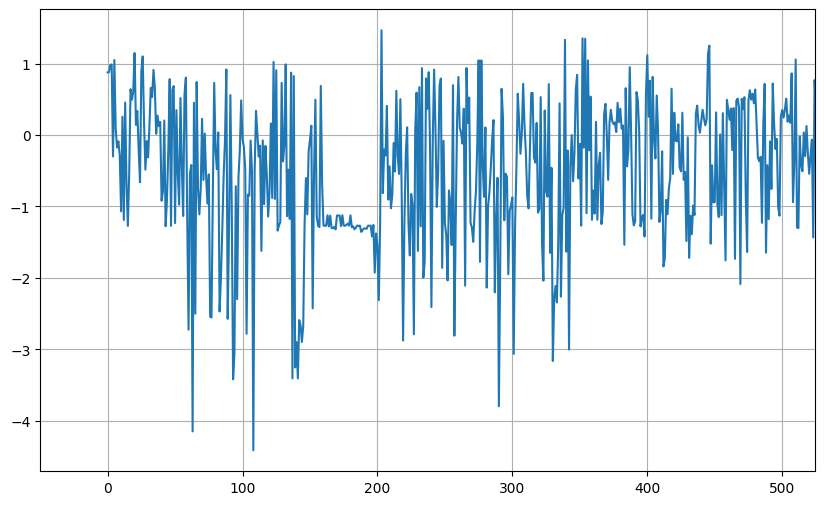

In [28]:
fig, ax = plt.subplots(figsize=(10,6)) #added figsize to increase width
ax.plot(df[:,1])
#ax.xaxis.zoom(2) # this line caused an error
ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1] / 2) #replacement line
ax.grid()
plt.show()

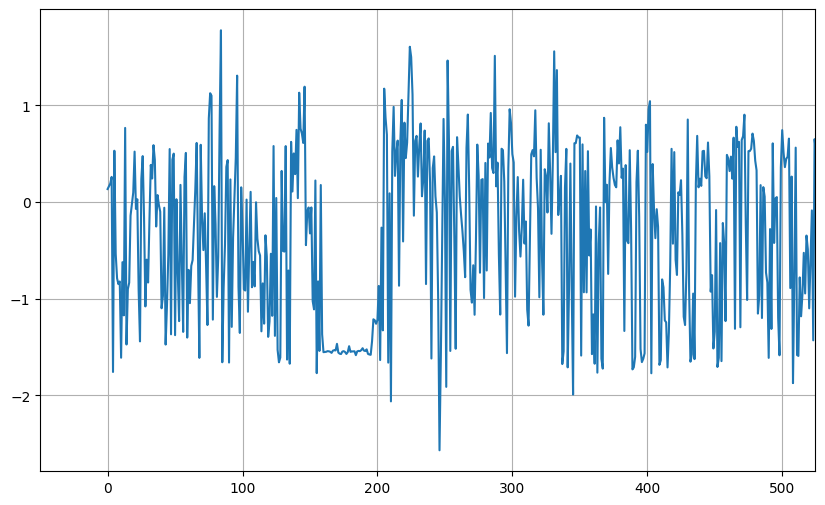

In [29]:
fig, ax = plt.subplots(figsize=(10,6)) #added figsize to increase width
ax.plot(df_test[:,1])
#ax.xaxis.zoom(2)  # this line caused an error
ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1] / 2) #replacement line
ax.grid()
plt.show()

In [30]:
de=pd.DataFrame(data=df[0:,0:],columns=df1.columns[:df.shape[1]]) # Sliced df1.columns to match df shape
de_test=pd.DataFrame(data=df_test[0:,0:],columns=df1_test.columns[:df_test.shape[1]]) # Sliced df1_test.columns to match df_test shape

In [31]:
de.head()

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272
0,0.870101,0.876006,0.850832,0.832040,0.864538,0.847502,0.836868,0.864733,0.842327,0.848482,...,-2.220446e-16,-2.220446e-16,2.220446e-16,0.0,0.0,-2.220446e-16,-1.110223e-16,0.0,0.0,0.0
1,0.889492,0.877759,0.863211,0.852758,0.917106,0.895364,0.878586,0.895995,0.878712,0.865239,...,-2.220446e-16,-2.220446e-16,2.220446e-16,0.0,0.0,-2.220446e-16,-1.110223e-16,0.0,0.0,0.0
2,1.003423,0.981490,0.965350,0.942226,0.995720,0.975128,0.970800,0.962636,0.954364,0.938037,...,-2.220446e-16,-2.220446e-16,2.220446e-16,0.0,0.0,-2.220446e-16,-1.110223e-16,0.0,0.0,0.0
3,1.007561,0.986714,0.979988,0.946562,1.003892,0.977501,0.979511,0.960126,0.950351,0.926017,...,-2.220446e-16,-2.220446e-16,2.220446e-16,0.0,0.0,-2.220446e-16,-1.110223e-16,0.0,0.0,0.0
4,-0.525336,-0.300270,-0.029136,-0.535967,-0.530945,-0.469302,-0.171728,-0.647076,-0.759271,-0.557513,...,-2.220446e-16,-2.220446e-16,2.220446e-16,0.0,0.0,-2.220446e-16,-1.110223e-16,0.0,0.0,0.0


In [32]:
de_test.head()

,V2,V3,V4,V5,V6,V7,V8,V9
0,0.165206,0.134480,0.126286,0.154049,0.172487,0.156843,0.193324,0.158667
1,0.207175,0.162934,0.168843,0.195252,0.195425,0.177392,0.222578,0.208768
2,0.222197,0.191525,0.187423,0.197485,0.191832,0.177996,0.204574,0.167514
3,0.288163,0.260216,0.254189,0.270320,0.270673,0.259065,0.294365,0.257581
4,-1.610578,-1.757443,-1.682340,-1.375993,-1.696381,-1.832639,-1.514535,-1.217552


In [33]:
dti = pd.date_range('2020-01-01', periods=len(de), freq='h') #changed periods to len(de) and 'H' to 'h' because FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead
de["time"]=dti
de.set_index('time', inplace=True)

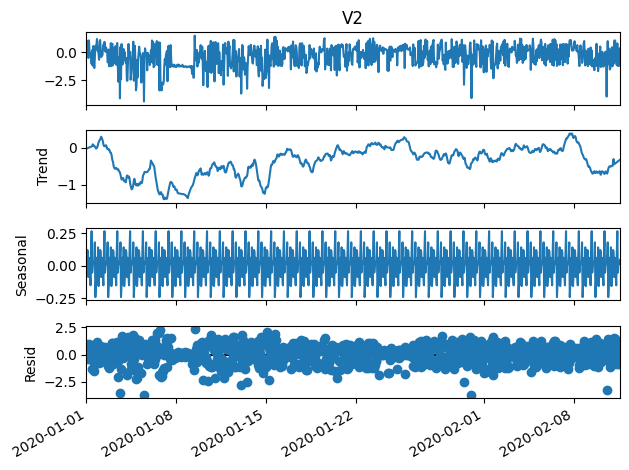

In [34]:
res = sm.tsa.seasonal_decompose(x=de["V2"],extrapolate_trend='freq')
x=res.plot()
plt.gcf().autofmt_xdate() #added line to rotate date labels
plt.tight_layout() #added to prevent overlap between subplots

In [35]:
dti = pd.date_range('2020-01-01', periods=len(de), freq='h') #changed periods to len(de) and 'H' to 'h' because FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead
de_test["time"]=dti
de_test.set_index('time', inplace=True)

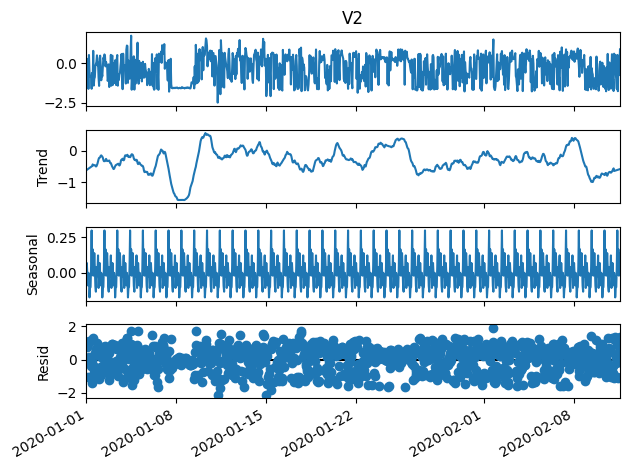

In [36]:
res_test = sm.tsa.seasonal_decompose(x=de_test["V2"],extrapolate_trend='freq')
x=res_test.plot()
plt.gcf().autofmt_xdate() #added line to rotate date labels
plt.tight_layout() #added to prevent overlap between subplots

In [37]:
res.resid

,resid
time,
2020-01-01 00:00:00,0.982162
2020-01-01 01:00:00,0.899387
2020-01-01 02:00:00,0.901766
2020-01-01 03:00:00,0.914398
2020-01-01 04:00:00,-0.430521
...,...
2020-02-11 11:00:00,-0.788795
2020-02-11 12:00:00,0.655895
2020-02-11 13:00:00,-0.910601


In [38]:
res.seasonal

,seasonal
time,
2020-01-01 00:00:00,-0.081778
2020-01-01 01:00:00,0.014711
2020-01-01 02:00:00,0.120586
2020-01-01 03:00:00,0.106415
2020-01-01 04:00:00,-0.087240
...,...
2020-02-11 11:00:00,-0.053207
2020-02-11 12:00:00,0.001844
2020-02-11 13:00:00,0.027304


In [39]:
res.trend

,trend
time,
2020-01-01 00:00:00,-0.030283
2020-01-01 01:00:00,-0.024606
2020-01-01 02:00:00,-0.018929
2020-01-01 03:00:00,-0.013252
2020-01-01 04:00:00,-0.007575
...,...
2020-02-11 11:00:00,-0.374303
2020-02-11 12:00:00,-0.363087
2020-02-11 13:00:00,-0.351870


In [40]:
res_test.resid

,resid
time,
2020-01-01 00:00:00,0.825817
2020-01-01 01:00:00,0.745175
2020-01-01 02:00:00,0.822925
2020-01-01 03:00:00,0.959747
2020-01-01 04:00:00,-1.039274
...,...
2020-02-11 11:00:00,-1.137761
2020-02-11 12:00:00,0.909465
2020-02-11 13:00:00,-0.138552


In [41]:
res_test.trend

,trend
time,
2020-01-01 00:00:00,-0.618015
2020-01-01 01:00:00,-0.606012
2020-01-01 02:00:00,-0.594008
2020-01-01 03:00:00,-0.582004
2020-01-01 04:00:00,-0.570001
...,...
2020-02-11 11:00:00,-0.603361
2020-02-11 12:00:00,-0.597972
2020-02-11 13:00:00,-0.592583


In [42]:
res_test.seasonal

,seasonal
time,
2020-01-01 00:00:00,-0.042596
2020-01-01 01:00:00,0.068012
2020-01-01 02:00:00,-0.006720
2020-01-01 03:00:00,-0.089580
2020-01-01 04:00:00,-0.001303
...,...
2020-02-11 11:00:00,-0.014583
2020-02-11 12:00:00,0.164705
2020-02-11 13:00:00,-0.021194


In [43]:
seasonal_data=[]
for i in de.columns:
  res = sm.tsa.seasonal_decompose(x=de[i],extrapolate_trend='freq')
  de[i]=res.trend+res.resid
  seasonal_data.append(pd.DataFrame(data=res.resid))

seasonal_test=[]
for i in de_test.columns:
  res_test = sm.tsa.seasonal_decompose(x=de_test[i],extrapolate_trend='freq')
  de_test[i]=res_test.trend+res_test.resid
  seasonal_test.append(pd.DataFrame(data=res_test.resid))

In [44]:
de.head()

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272
time,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,0.951879,0.951483,0.954513,0.930965,0.942989,0.931403,0.935985,0.950468,0.925345,0.933498,...,-0.023423,-0.023296,-0.023306,-0.023282,-0.022958,-0.022259,-0.022078,-0.022479,-0.022141,-0.022049
2020-01-01 01:00:00,0.874781,0.858591,0.826417,0.825595,0.886129,0.845616,0.831008,0.851583,0.834872,0.820413,...,0.017778,0.017445,0.017407,0.017212,0.016686,0.016935,-0.004966,-0.004984,-0.005022,-0.005000
2020-01-01 02:00:00,0.882837,0.861525,0.833438,0.819269,0.872081,0.861360,0.853887,0.847563,0.867371,0.847744,...,-0.005605,-0.005607,-0.005645,-0.005782,-0.005925,-0.005627,-0.004966,-0.004984,-0.005022,-0.005000
2020-01-01 03:00:00,0.901146,0.884617,0.874413,0.854864,0.898138,0.876821,0.890220,0.889135,0.854875,0.845062,...,-0.011209,-0.011195,-0.010996,-0.010937,-0.010831,-0.010425,-0.010111,-0.010007,-0.009912,-0.009986
2020-01-01 04:00:00,-0.438095,-0.219674,0.035860,-0.464983,-0.440064,-0.374537,-0.094780,-0.561066,-0.637621,-0.465497,...,-0.017488,-0.017556,-0.017495,-0.017499,-0.017423,-0.017093,-0.016106,-0.016166,-0.016156,-0.016288


In [45]:
de_test.head()

,V2,V3,V4,V5,V6,V7,V8,V9
time,,,,,,,,
2020-01-01 00:00:00,0.207802,0.164965,0.159904,0.192390,0.207477,0.186211,0.219223,0.187682
2020-01-01 01:00:00,0.139163,0.089502,0.095242,0.117382,0.097990,0.080895,0.119339,0.104559
2020-01-01 02:00:00,0.228917,0.181229,0.184600,0.194395,0.187011,0.160005,0.190265,0.162369
2020-01-01 03:00:00,0.377743,0.343811,0.341689,0.354942,0.374838,0.358018,0.387668,0.356615
2020-01-01 04:00:00,-1.609275,-1.759823,-1.701117,-1.408478,-1.734229,-1.842569,-1.534502,-1.251942


In [46]:
print(len(seasonal_data))
print(len(seasonal_data[0]))
print(len(seasonal_test))
print(len(seasonal_test[0]))

271
1000
8
1000


In [47]:
#improved previous code cells
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length - 1):
        x = data.iloc[i:i + seq_length].values  #Extracted values as NumPy array
        y = data.iloc[i + seq_length + 1].values   #Extracted values as NumPy array
        sequences.append(x)
        labels.append(y)
    return np.array(sequences), np.array(labels)

seq_len=5
X_train=[]
y_train=[]

for i in de.columns:
  X_temp, y_temp = create_sequences(de[[i]], seq_len)
  X_train.extend(X_temp)
  y_train.extend(y_temp)

# Converted lists to NumPy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

X_train = X_train.reshape(-1, seq_len, 1)  #Reshaped for LSTM input
y_train = y_train.reshape(-1, 1)   #Reshaped target


# Converted to PyTorch tensors
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()

In [48]:
# Prepared test data in a similar way
X_test=[]
y_test=[]
for i in de_test.columns:
  X_temp, y_temp = create_sequences(de_test[[i]], seq_len)
  X_test.extend(X_temp)
  y_test.extend(y_temp)

# Converted lists to NumPy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

X_test = X_test.reshape(-1, seq_len, 1)  #Reshaped for LSTM input
y_test = y_test.reshape(-1, 1)   #Reshaped target


# Converted to PyTorch tensors
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

In [49]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

torch.Size([269374, 5, 1])
torch.Size([269374, 1])
torch.Size([7952, 5, 1])
torch.Size([7952, 1])


In [50]:
class Tdataset(Dataset):
  def __init__(self,X_train,y_train):
    self.X_train=X_train
    self.y_train=y_train
    self.n_samples=X_train.shape[0]
  def __getitem__(self,index):
    return self.X_train[index], self.y_train[index]
  def __len__(self):
    return self.n_samples

In [52]:
dataset=Tdataset(X_train,y_train)
dataloader = DataLoader(dataset=dataset,batch_size=128,num_workers=3) #reduced batch size

In [53]:
class LSTMpred(nn.Module):

  def __init__(self, n_features, n_hidden, seq_len, n_layers=2):
    super(LSTMpred, self).__init__()

    self.n_hidden = n_hidden
    self.seq_len = seq_len
    self.n_layers = n_layers

    self.lstm = nn.LSTM(
      input_size=n_features,
      hidden_size=n_hidden,
      num_layers=n_layers,
      dropout=0.3
    )

    self.linear = nn.Linear(in_features=n_hidden, out_features=1)

  def reset_hidden_state(self):
    self.hidden = (
        torch.zeros(self.n_layers, self.seq_len, self.n_hidden),
        torch.zeros(self.n_layers, self.seq_len, self.n_hidden)
    )

  def forward(self, sequences):
    lstm_out, self.hidden = self.lstm(
      sequences.view(len(sequences), self.seq_len, -1),
      self.hidden
    )
    last_time_step = \
      lstm_out.view(self.seq_len, len(sequences), self.n_hidden)[-1]
    y_pred = self.linear(last_time_step)
    return y_pred

In [54]:
from sklearn.model_selection import train_test_split

#Split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [55]:
def train_model(
    model,
    X_train,
    y_train,
    X_val,
    y_val,
    lr=0.001,
    weight_decay=1e-4,
    num_epochs=100,
    patience=10
):

    #Loss function and optimizer
    loss_fn = torch.nn.SmoothL1Loss()
    optimiser = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    scheduler = torch.optim.lr_scheduler.StepLR(optimiser, step_size=50, gamma=0.1)


    train_hist = np.zeros(num_epochs)
    val_hist = np.zeros(num_epochs)

    #Early stopping variables
    best_loss = float('inf')
    no_improve_count = 0

    for epoch in range(num_epochs):
        model.reset_hidden_state()


        y_pred_train = model(X_train)
        train_loss = loss_fn(y_pred_train.float(), y_train)


        with torch.no_grad():
            y_pred_val = model(X_val)
            val_loss = loss_fn(y_pred_val.float(), y_val)

        #Early stopping logic
        if val_loss.item() < best_loss:
            best_loss = val_loss.item()
            no_improve_count = 0
        else:
            no_improve_count += 1
            if no_improve_count >= patience:
                print(f"Early stopping triggered at epoch {epoch + 1}")
                break


        print(f"Epoch {epoch + 1}/{num_epochs} | Train Loss: {train_loss.item()} | Val Loss: {val_loss.item()}")

        #Gradient descent
        optimiser.zero_grad()
        train_loss.backward()
        optimiser.step()
        scheduler.step()

        train_hist[epoch] = train_loss.item()
        val_hist[epoch] = val_loss.item()

    return model.eval(), train_hist, val_hist

In [56]:
model= LSTMpred(1,50,5,n_layers=3)

In [57]:
model, train_hist, val_hist = train_model(
    model=model,
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    lr=0.001,
    weight_decay=1e-4,
    num_epochs=100,
    patience=10
)

Epoch 1/100 | Train Loss: 0.10044054687023163 | Val Loss: 0.10252577811479568
Epoch 2/100 | Train Loss: 0.09833734482526779 | Val Loss: 0.10039027035236359
Epoch 3/100 | Train Loss: 0.09665340185165405 | Val Loss: 0.09869353473186493
Epoch 4/100 | Train Loss: 0.0954161062836647 | Val Loss: 0.09742377698421478
Epoch 5/100 | Train Loss: 0.09464915841817856 | Val Loss: 0.09664426743984222
Epoch 6/100 | Train Loss: 0.09439189732074738 | Val Loss: 0.09636610001325607
Epoch 7/100 | Train Loss: 0.09457233548164368 | Val Loss: 0.09651907533407211
Epoch 8/100 | Train Loss: 0.0949518159031868 | Val Loss: 0.09689419716596603
Epoch 9/100 | Train Loss: 0.09522993862628937 | Val Loss: 0.0971834734082222
Epoch 10/100 | Train Loss: 0.09527086466550827 | Val Loss: 0.09719237685203552
Epoch 11/100 | Train Loss: 0.09511865675449371 | Val Loss: 0.09707733988761902
Epoch 12/100 | Train Loss: 0.09490210562944412 | Val Loss: 0.09686072170734406
Epoch 13/100 | Train Loss: 0.09467343240976334 | Val Loss: 0.096

In [58]:
train_hist

array([0.10044055, 0.09833734, 0.0966534 , 0.09541611, 0.09464916,
       0.0943919 , 0.09457234, 0.09495182, 0.09522994, 0.09527086,
       0.09511866, 0.09490211, 0.09467343, 0.09450932, 0.09441793,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [59]:
val_hist

array([0.10252578, 0.10039027, 0.09869353, 0.09742378, 0.09664427,
       0.0963661 , 0.09651908, 0.0968942 , 0.09718347, 0.09719238,
       0.09707734, 0.09686072, 0.09664627, 0.0964727 , 0.0963742 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

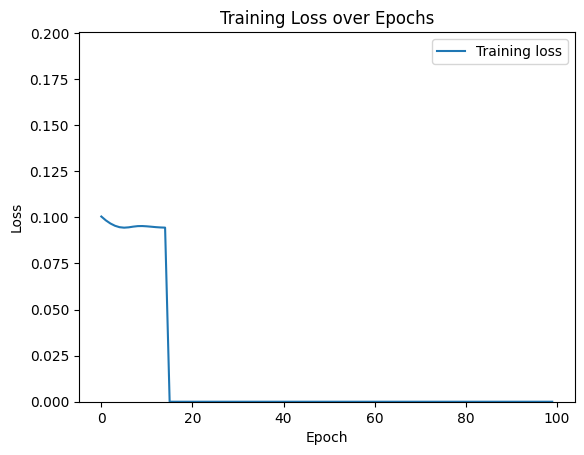

In [61]:
# added this code cell because the previous one was not displaying plot
plt.plot(train_hist, label="Training loss")
plt.ylim((0, max(train_hist) + 0.1 ))
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.show()

In [62]:
with torch.no_grad():
  y_test_pred = model(X_test)
  test_loss = torch.nn.SmoothL1Loss()(y_test_pred.float(), y_test.float())

print(f"Test Loss: {test_loss.item()}")

Test Loss: 0.35895246267318726


In [63]:
y_test_pred.shape

torch.Size([7952, 1])

In [65]:
y_test_pred[1]

tensor([-0.0518])

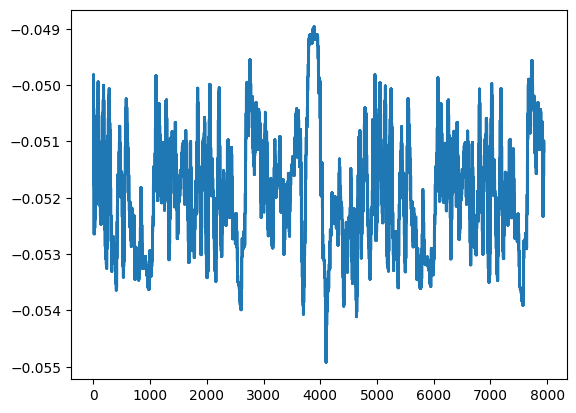

In [67]:
plt.plot(y_test_pred)

In [70]:
!cp MLP_Project_draft.ipynb Retail-cost-prediction-using-LSTM-MSNET

cp: cannot stat 'MLP_Project_draft.ipynb': No such file or directory


In [68]:
!cp MLP_Project_draft.ipynb .

cp: cannot stat 'MLP_Project_draft.ipynb': No such file or directory
